## Multiple Linear Regression

Now you know how to build a model with one X (independent variable) and Y (dependent variable). But what if you have three feature variables, or may be 10 or 100? By using multiple linear regression, you can build models between a dependent variable and many independent variables.

Dataset - advertising.csv

Independent variables - TV Ad Expenses, Radio Ad Expenses, Newspaper Ad Expenses

Dependent variable - Sales

In [75]:
#1 Import necessery libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [76]:
#2 Import the dataset (advertising.csv) and look at the top five rows
dataset=pd.read_csv("advertising.csv")
dataset.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [77]:
#3 Look at the bottom five rows
dataset.tail(5)

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [78]:
#4 Check the shape of the DataFrame (rows, columns)
dataset.shape

(200, 4)

In [79]:
#5 Look at the data types of the columns
dataset.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [80]:
#6 Look at the summary statistics
dataset.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


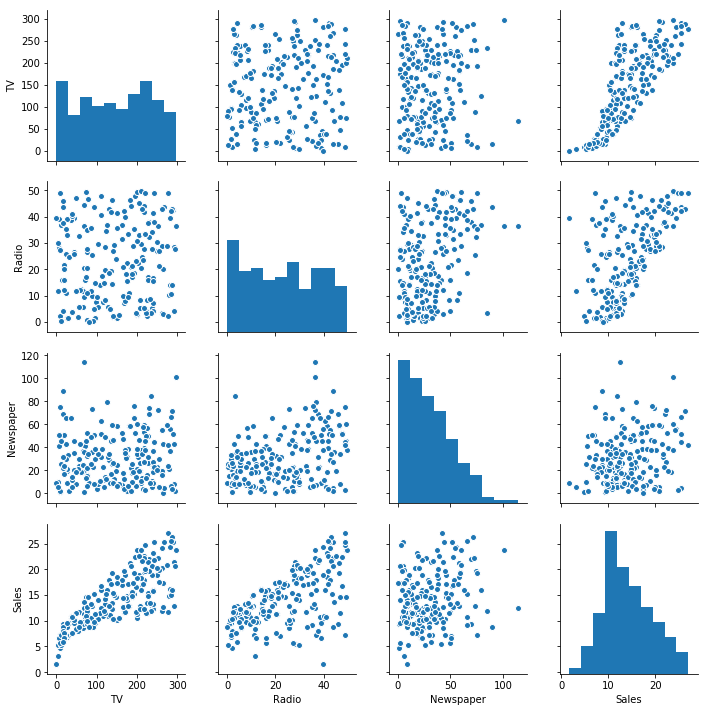

In [81]:
#7 Do a pairplot of the variables
sns.pairplot(dataset)

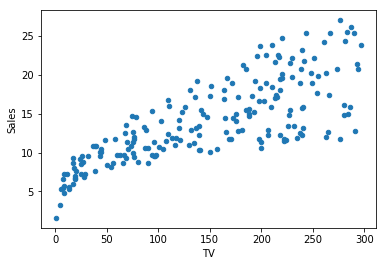

In [82]:
#8 Visualise the relationship between the independent variables and the depenedent variable using scatterplots

dataset.plot(kind="scatter",x="TV",y="Sales",rot=0)
plt.show()

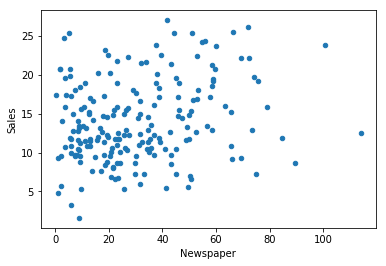

In [83]:
dataset.plot(kind="scatter",x="Newspaper",y="Sales",rot=0)
plt.show()

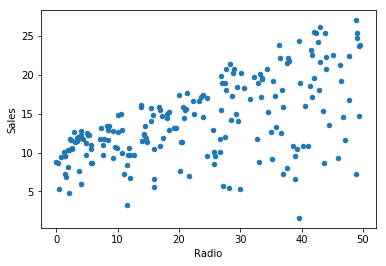

In [84]:
dataset.plot(kind="scatter",x="Radio",y="Sales")
plt.show()

In [85]:
#9 Prepare  X (independent variables) and y (dependent variable)
X=dataset.iloc[0:,:-1]
print(x)
Y=dataset.iloc[:,-1:]
print(y)

        TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
5      8.7   48.9       75.0
6     57.5   32.8       23.5
7    120.2   19.6       11.6
8      8.6    2.1        1.0
9    199.8    2.6       21.2
10    66.1    5.8       24.2
11   214.7   24.0        4.0
12    23.8   35.1       65.9
13    97.5    7.6        7.2
14   204.1   32.9       46.0
15   195.4   47.7       52.9
16    67.8   36.6      114.0
17   281.4   39.6       55.8
18    69.2   20.5       18.3
19   147.3   23.9       19.1
20   218.4   27.7       53.4
21   237.4    5.1       23.5
22    13.2   15.9       49.6
23   228.3   16.9       26.2
24    62.3   12.6       18.3
25   262.9    3.5       19.5
26   142.9   29.3       12.6
27   240.1   16.7       22.9
28   248.8   27.1       22.9
29    70.6   16.0       40.8
..     ...    ...        ...
170   50.0   11.6       18.4
171  164.5   20.9       47.4
172   19.6   2

In [86]:
#10 Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, y_train, X_test, y_test
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)
print(X_train.shape)
print(Y_train.shape)
print(Y_test.shape)
print(Y_test.shape)

(140, 3)
(140, 1)
(60, 1)
(60, 1)


In [87]:
#11 Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
reges=regressor.fit(X_train,Y_train)


In [109]:
#12 Predict on the train set and calculate the error = y_pred - y_train
# Residual plot - plot y_pred in x axs and errors in y axis
y_pred=regressor.predict(X_train)
y_train=np.array(Y_train)
error=y_pred-y_train
print(error)


[[ 2.48668568e+00]
 [ 5.69777654e-01]
 [ 1.40777814e+00]
 [-4.29121835e-01]
 [-5.76443874e-01]
 [-1.41236523e-01]
 [ 1.41757075e-02]
 [-5.55657769e-01]
 [-1.48132564e+00]
 [-2.31817899e-01]
 [-9.04393760e-01]
 [-1.42340172e+00]
 [-1.97461829e-03]
 [-4.47068141e-01]
 [-1.25923398e+00]
 [ 6.70287673e-01]
 [-3.06111646e-01]
 [-4.82620423e-01]
 [ 9.11212023e-01]
 [-5.84067662e-01]
 [-2.45948246e-01]
 [-1.73195343e+00]
 [ 3.93651336e-01]
 [-2.27570234e+00]
 [-1.71714400e+00]
 [ 8.43856431e-01]
 [ 3.65620026e+00]
 [-3.41393172e-01]
 [ 2.33253863e+00]
 [-2.72334187e-01]
 [ 7.97355672e-01]
 [-1.61070360e+00]
 [-7.04605793e-01]
 [-1.23780206e+00]
 [-1.68661822e+00]
 [ 3.73596096e+00]
 [-2.08885518e+00]
 [ 4.50696214e+00]
 [-8.57888290e-01]
 [-4.15093158e-01]
 [ 3.56771675e+00]
 [-1.53005657e+00]
 [ 9.39193165e-01]
 [-1.41667873e+00]
 [-1.07922925e+00]
 [ 1.14279400e+00]
 [-4.22007320e-01]
 [-7.37197071e-01]
 [ 8.39163593e-01]
 [ 3.13955508e-01]
 [-1.05648137e+00]
 [-1.47069122e+00]
 [ 1.3142322

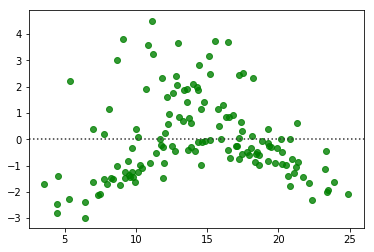

In [110]:
# Residual plot - plot y_pred in x axs and errors in y axis
sns.residplot(y_pred,error,color="g")
xlabel="y_pred"
ylabel="errors"
plt.show()

In [111]:
#13 Predic on the test set 
pre=regressor.predict(X_test)

print(pre)

[[10.05866652]
 [ 7.43318827]
 [ 6.95305695]
 [24.16874598]
 [11.98172029]
 [ 6.54464708]
 [13.19426793]
 [14.90240334]
 [11.07675294]
 [16.25061663]
 [23.0081158 ]
 [ 9.12072148]
 [10.29342297]
 [15.3709661 ]
 [11.62396513]
 [12.1057432 ]
 [18.55030805]
 [10.85810888]
 [16.13879856]
 [17.20281404]
 [24.25469939]
 [ 9.43869821]
 [15.13419408]
 [12.41283844]
 [ 5.66973859]
 [15.23876681]
 [12.1878762 ]
 [20.95164149]
 [13.22671807]
 [ 9.20954724]
 [13.39812727]
 [21.61944517]
 [18.05938674]
 [21.14798547]
 [ 6.73582996]
 [ 6.16799717]
 [ 7.98042607]
 [13.09083488]
 [14.86214078]
 [ 6.23597127]
 [12.35246911]
 [ 9.19452235]
 [15.04717679]
 [16.23039254]
 [17.17240889]
 [13.3341216 ]
 [ 3.68035786]
 [12.53946851]
 [15.93674769]
 [ 8.67881357]
 [10.62459997]
 [19.5646526 ]
 [18.3472282 ]
 [15.24662975]
 [10.04846378]
 [ 8.17344188]
 [21.49061088]
 [14.137309  ]
 [16.29760212]
 [ 8.90502274]]


In [119]:
#14 Print Mean Squared Error and R Squared Value
from sklearn.metrics import mean_squared_error,r2_score
rme=mean_squared_error(pre,Y_test)
rme

3.6913948456986083

In [118]:
R=r2_score(pre,Y_test)
R

0.8454397519692016

## Backward elimination

In [14]:
#15 Build the optimal model using backward elimination








## Housing Case Study
Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —


- To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

- To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

- To know the accuracy of the model, i.e. how well these variables can predict house prices.

In [122]:
#16Import the dataset (Housing.csv) and look at the top five rows
datasethouse=pd.read_csv("Housing.csv")
datasethouse.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [124]:
#17 Look at the bottom five rows
datasethouse.tail(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [125]:
#18 Check the shape of the DataFrame (rows, columns)
datasethouse.shape

(545, 13)

In [126]:
#19 Look at the data types of the columns
datasethouse.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [127]:
#20 Look at the summary statistics
datasethouse.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [143]:
#21 Prepare  X (independent variables) and y (dependent variable)
X=datasethouse.iloc[0:,1:]

Y=datasethouse.iloc[0:,:1]
print(X)
print(Y)

      area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0     7420         4          2        3      yes        no       no   
1     8960         4          4        4      yes        no       no   
2     9960         3          2        2      yes        no      yes   
3     7500         4          2        2      yes        no      yes   
4     7420         4          1        2      yes       yes      yes   
5     7500         3          3        1      yes        no      yes   
6     8580         4          3        4      yes        no       no   
7    16200         5          3        2      yes        no       no   
8     8100         4          1        2      yes       yes      yes   
9     5750         3          2        4      yes       yes       no   
10   13200         3          1        2      yes        no      yes   
11    6000         4          3        2      yes       yes      yes   
12    6550         4          2        2      yes        no     

In [151]:
#22 Encoding categorical data in X
# Categorical boolean mask
categorical_feature_mask=X.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols=X.columns[categorical_feature_mask].tolist()
categorical_cols

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

In [152]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le=LabelEncoder()

In [154]:
# apply le on categorical feature columns
X[categorical_cols]=X[categorical_cols].apply(lambda col:le.fit_transform(col))
X[categorical_cols].head(10)
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,0
1,8960,4,4,4,1,0,0,0,1,3,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,0
4,7420,4,1,2,1,1,1,0,1,2,0,0
5,7500,3,3,1,1,0,1,0,1,2,1,1
6,8580,4,3,4,1,0,0,0,1,2,1,1
7,16200,5,3,2,1,0,0,0,0,0,0,2
8,8100,4,1,2,1,1,1,0,1,2,1,0
9,5750,3,2,4,1,1,0,0,1,1,1,2


In [150]:
#23 Avoiding the Dummy Variable Trap
#datasethouse.isnull().sum()

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [155]:
#24 Look at the top 5 rows after preprocessing
X.head(5)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,0
1,8960,4,4,4,1,0,0,0,1,3,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,0
4,7420,4,1,2,1,1,1,0,1,2,0,0


In [27]:
#25 Apply feature scaling on numerical variables


In [28]:
#26 Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, y_train, X_test, y_test


## Backward elimination

In [ ]:
#27 #15 Build the optimal model using backward elimination







